# Einarbeitung in den Kernel Density Estimator (KDE)

## Messungen simulieren

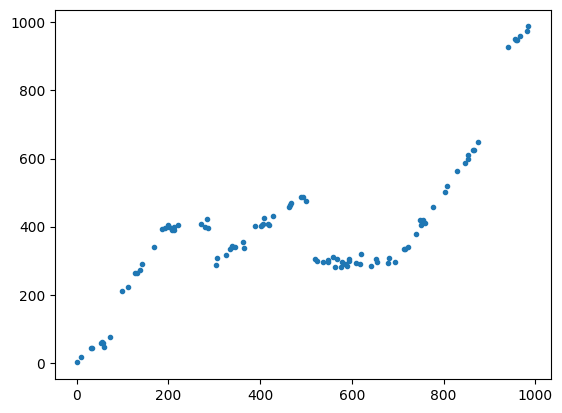

In [36]:
import numpy

ts = []
xs = []
N = 100
for i in range(N):
    t = numpy.random.uniform(low=0.0, high=1000.0)
    x = t
    if t>100 and t<300:
        x += 200 - abs(t-200)

    if t>500 and t<900:
        x -= 400 - abs(t-700)
        
    x += numpy.random.normal(0,10)

    ts.append( t )
    xs.append( x )

import matplotlib.pyplot as plt
plt.scatter(ts, xs, marker=".")
plt.show()    

## KDE-Schätzung

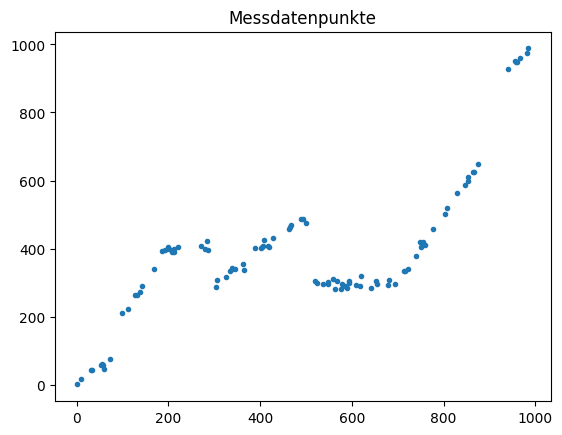

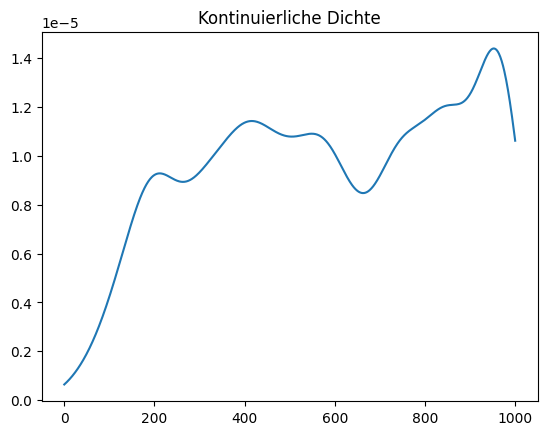

In [48]:
import math

t2s = []
fs = []

def K(u):
    """
    Gauß-Kernel
    """
    return 1/math.sqrt(math.tau) * math.exp(-u**2/2)

def KDE(a, ts, xs):
    """
    Kerndichteschätzer
    """
    h = 50.0
    N = len(ts)
    s = 0.0
    W = 0.0
    for i in range(N):
        s += K( abs(ts[i]-a) / h ) * xs[i]
        W += xs[i]
    s *= 1/(W*h*N)
    return s

for t2 in numpy.arange(0.0, 1001.0, 1.0):
    f = KDE(t2, ts, xs)

    t2s.append( t2 )
    fs.append( f )


import matplotlib.pyplot as plt
plt.title("Messdatenpunkte")
plt.scatter(ts, xs, marker=".")
plt.show()

import matplotlib.pyplot as plt
plt.title("Kontinuierliche Dichte")
plt.plot(t2s, fs)
plt.show()

In [38]:
xs[0:20]

[309.9517623342183,
 265.1444990853915,
 988.0099019550347,
 304.08837057973324,
 405.1553139890906,
 464.21654375526225,
 0.8875839125387796,
 289.80081332471093,
 409.4104035826133,
 281.5752185582015,
 318.18186667531177,
 396.04273165572505,
 378.48826319445703,
 403.96328517629365,
 398.76990750876064,
 390.2317700068539,
 647.2940182656247,
 59.095581100247244,
 338.4033027745729,
 408.8505431129307]